# Task 5: Feature Engineering & Imporvement

In [131]:
# importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

- #### Create new features that might improve model performance.


In [132]:
# loading the original dataset
df = pd.read_csv('../data/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [133]:
# Creating the CRIM_LSTAT_RATIO feature
df['CRIM_LSTAT_RATIO'] = df['crim'] / df['lstat']

From the heatmap in EDA, it was found that lstat had the highly neagtive correlation with medv. crim also has a moderately negative coorelation with medv. But coincidenly, lstat and crim have moderatley positive corelation. 

The new feature CRIM_LSTAT_RATIO is a crime to status ratio that measures the ratio of crime rate to the percentage of lower status population. It might help us capture how crime and socio-economic status interact in affecting the hosuing prices. 


In [134]:
# Defining features and target variable
X = df.drop('medv', axis=1)
y = df['medv']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model with the new feature
model_with_feature = LinearRegression()
model_with_feature.fit(X_train, y_train)


LinearRegression()

In [135]:
# Predicting on the test set
y_pred_with_feature = model_with_feature.predict(X_test)

# Evaluating the model performance with the new feature
mse_with_feature = mean_squared_error(y_test, y_pred_with_feature)
r2_with_feature = r2_score(y_test, y_pred_with_feature)

print(f"Mean Squared Error with CRIM_LSTAT_RATIO: {mse_with_feature}")
print(f"R² Score with CRIM_LSTAT_RATIO: {r2_with_feature}")

Mean Squared Error with CRIM_LSTAT_RATIO: 27.64162760921062
R² Score with CRIM_LSTAT_RATIO: 0.6230710265038386


In [136]:
# for comparitive evaluation without the new feature
X_baseline = df.drop(['medv', 'CRIM_LSTAT_RATIO'], axis=1)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

model_baseline = LinearRegression()
model_baseline.fit(X_train_baseline, y_train_baseline)

y_pred_baseline = model_baseline.predict(X_test_baseline)
mse_baseline = mean_squared_error(y_test_baseline, y_pred_baseline)
r2_baseline = r2_score(y_test_baseline, y_pred_baseline)

print(f"Baseline Mean Squared Error: {mse_baseline}")
print(f"Baseline R² Score: {r2_baseline}")

Baseline Mean Squared Error: 24.291119474973613
Baseline R² Score: 0.6687594935356307


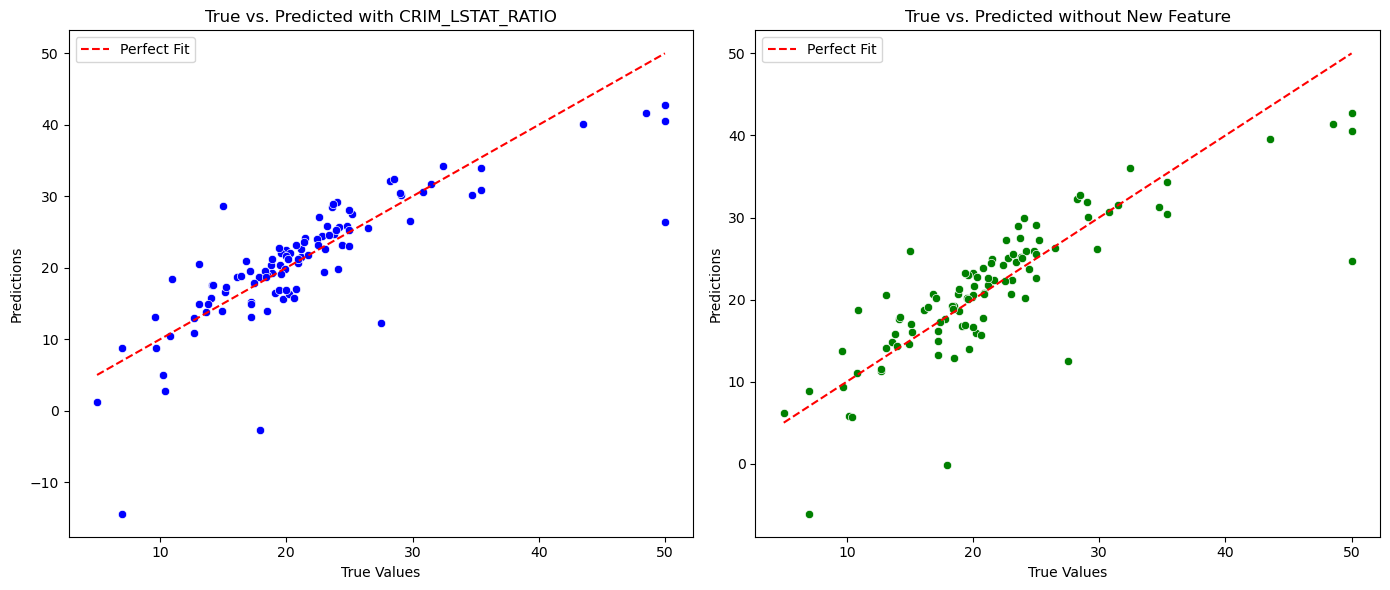

In [137]:
# For plotting
plot_df_with_feature = pd.DataFrame({
    'True Values': y_test,
    'Predictions': y_pred_with_feature
})

plot_df_baseline = pd.DataFrame({
    'True Values': y_test_baseline,
    'Predictions': y_pred_baseline
})

# Plot True vs. Predicted values with the new feature
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='True Values', y='Predictions', data=plot_df_with_feature, color='blue')
plt.plot([plot_df_with_feature['True Values'].min(), plot_df_with_feature['True Values'].max()], 
         [plot_df_with_feature['True Values'].min(), plot_df_with_feature['True Values'].max()], 
         color='red', linestyle='--', label='Perfect Fit')
plt.title('True vs. Predicted with CRIM_LSTAT_RATIO')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Plot True vs. Predicted values without the new feature
plt.subplot(1, 2, 2)
sns.scatterplot(x='True Values', y='Predictions', data=plot_df_baseline, color='green')
plt.plot([plot_df_baseline['True Values'].min(), plot_df_baseline['True Values'].max()], 
         [plot_df_baseline['True Values'].min(), plot_df_baseline['True Values'].max()], 
         color='red', linestyle='--', label='Perfect Fit')
plt.title('True vs. Predicted without New Feature')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

plt.tight_layout()
plt.show()

The plotting comparision shows that after the addition of new feature to the dataset, the prediction has come closer to the perfect fit. Thus, signifying a slight improvement in the second model where the new feature was added. However, the  MSE and R^2 score suggests that the new feature did not add useful information possibly due to outliers and untrasformed dataset.

As the model evaluation suggested that the preprocessed dataset results in a better prediction (measured by Mean Squared Error and R^2 score), we will also be using the same data set for feature engineering and improvement.

In [138]:
# loading the dataset
df_clean = pd.read_csv('../data/BostonHousingClean.csv')
df_clean.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-1.979504,0.932298,1.603122,0,0.336863,0.616322,0.345990,0.401292,0.000000,-0.569839,0.797737,0.000000,-1.287450,0.530769
1,-1.300867,0.000000,2.707397,0,0.187900,0.326883,-0.134899,0.486379,0.106236,-1.094176,0.575464,0.000000,-0.441887,0.438462
2,-1.301207,0.000000,2.707397,0,0.187900,1.762802,0.471003,0.486379,0.106236,-1.094176,0.575464,0.209681,-1.537766,0.942308
3,-1.222048,0.000000,1.562050,0,0.163719,1.411340,0.888428,0.582385,0.187754,-1.353016,0.482558,0.143249,-1.879738,0.892308
4,-0.870751,0.000000,1.562050,0,0.163719,1.691382,0.667675,0.582385,0.187754,-1.353016,0.482558,0.000000,-1.202885,1.000000


Exploring the correaltion between the tansformed features

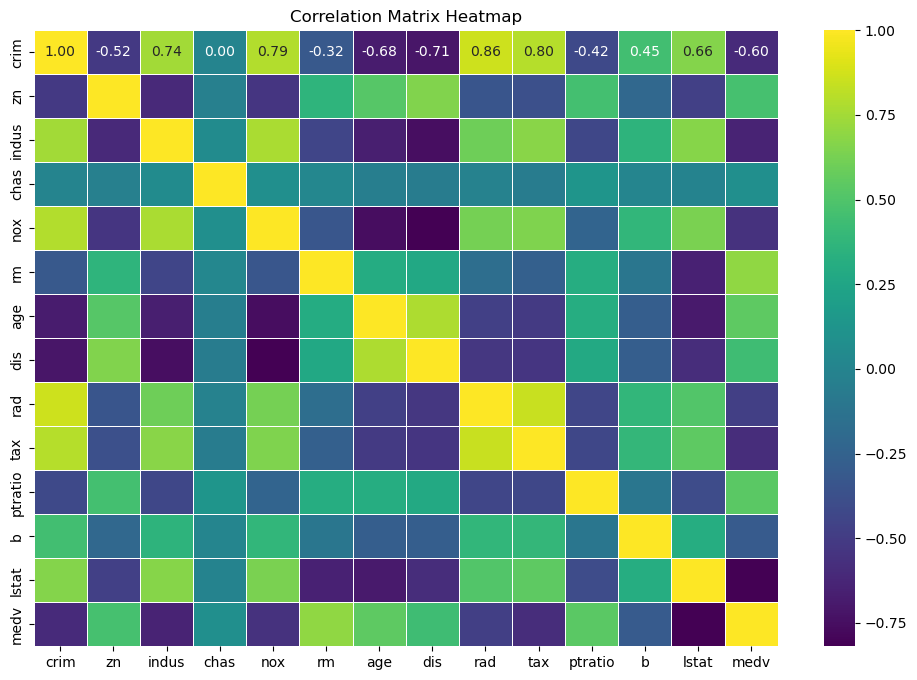

In [139]:
# Calculate the correlation matrix
corr_matrix = df_clean.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

rad and nox  both have moderately negative coorelation with medv but they have moderatly positive correaltion with each other. The interaction of rad and nox could potentially capture a relationship between accessibility and environmental pollution, which might jointly influence housing prices.

In [140]:
# Creating the RAD_NOX_INTERACTION feature
df_clean['RAD_NOX_INTERACTION'] = df_clean['rad'] * df_clean['nox']

In [141]:
# Defining features and target variable
X = df_clean.drop('medv', axis=1)
y = df_clean['medv']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model with the new feature
model_with_feature = LinearRegression()
model_with_feature.fit(X_train, y_train)

LinearRegression()

In [142]:
# Predicting on the test set
y_pred_with_feature = model_with_feature.predict(X_test)

# Evaluating the model performance with the new feature
mse_with_feature = mean_squared_error(y_test, y_pred_with_feature)
r2_with_feature = r2_score(y_test, y_pred_with_feature)

print(f"Mean Squared Error with RAD_NOX_INTERACTION: {mse_with_feature}")
print(f"R² Score with RAD_NOX_INTERACTION: {r2_with_feature}")

Mean Squared Error with RAD_NOX_INTERACTION: 0.012534792907352212
R² Score with RAD_NOX_INTERACTION: 0.7849474751563579


In [143]:
# for comparitive evaluation without the new feature
X_baseline = df_clean.drop(['medv', 'RAD_NOX_INTERACTION'], axis=1)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

model_baseline = LinearRegression()
model_baseline.fit(X_train_baseline, y_train_baseline)

y_pred_baseline = model_baseline.predict(X_test_baseline)
mse_baseline = mean_squared_error(y_test_baseline, y_pred_baseline)
r2_baseline = r2_score(y_test_baseline, y_pred_baseline)

print(f"Baseline Mean Squared Error: {mse_baseline}")
print(f"Baseline R² Score: {r2_baseline}")

Baseline Mean Squared Error: 0.01299067621416782
Baseline R² Score: 0.7771261368311542


- #### Test different feature combinations.

The evaluation metrics suggest that the feature RAD_NOX_INTERACTION has slighty improved the model.

After the data cleaning and trasformation during the data preprocessing, the MSE has drastically decreased and R^2 score has decreased indicating that the prediction of model had already improved very highly. It suggest that many possible meature relations has already read by the model. Thus finding new feature that will highy improve the model if difficult. So, feature combination is done to add different features and evaluate their combination. 

In [144]:
# Creating the CRIM_LSTAT_RATIO feature
df_clean['RM_LSTAT_INTERACTION'] = df_clean['rm'] * df_clean['lstat']

In [145]:
# Defining features and target variable
X = df_clean.drop('medv', axis=1)
y = df_clean['medv']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model with the new feature
model_with_feature = LinearRegression()
model_with_feature.fit(X_train, y_train)

LinearRegression()

In [146]:
# Predicting on the test set
y_pred_with_feature = model_with_feature.predict(X_test)

# Evaluating the model performance with the new feature
mse_with_feature = mean_squared_error(y_test, y_pred_with_feature)
r2_with_feature = r2_score(y_test, y_pred_with_feature)

print(f"Mean Squared Error with RM_LSTAT_INTERACTION: {mse_with_feature}")
print(f"R² Score with RM_LSTAT_INTERACTION: {r2_with_feature}")

Mean Squared Error with RM_LSTAT_INTERACTION: 0.010038689505388682
R² Score with RM_LSTAT_INTERACTION: 0.8277717438004939


In [147]:
# for comparitive evaluation without the new feature
X_baseline = df_clean.drop(['medv', 'RM_LSTAT_INTERACTION'], axis=1)
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

model_baseline = LinearRegression()
model_baseline.fit(X_train_baseline, y_train_baseline)

y_pred_baseline = model_baseline.predict(X_test_baseline)
mse_baseline = mean_squared_error(y_test_baseline, y_pred_baseline)
r2_baseline = r2_score(y_test_baseline, y_pred_baseline)

print(f"New Baseline Mean Squared Error: {mse_baseline}")
print(f"New Baseline R² Score: {r2_baseline}")

New Baseline Mean Squared Error: 0.012534792907352212
New Baseline R² Score: 0.7849474751563579


- #### Evaluate the impact of new features on model performance.


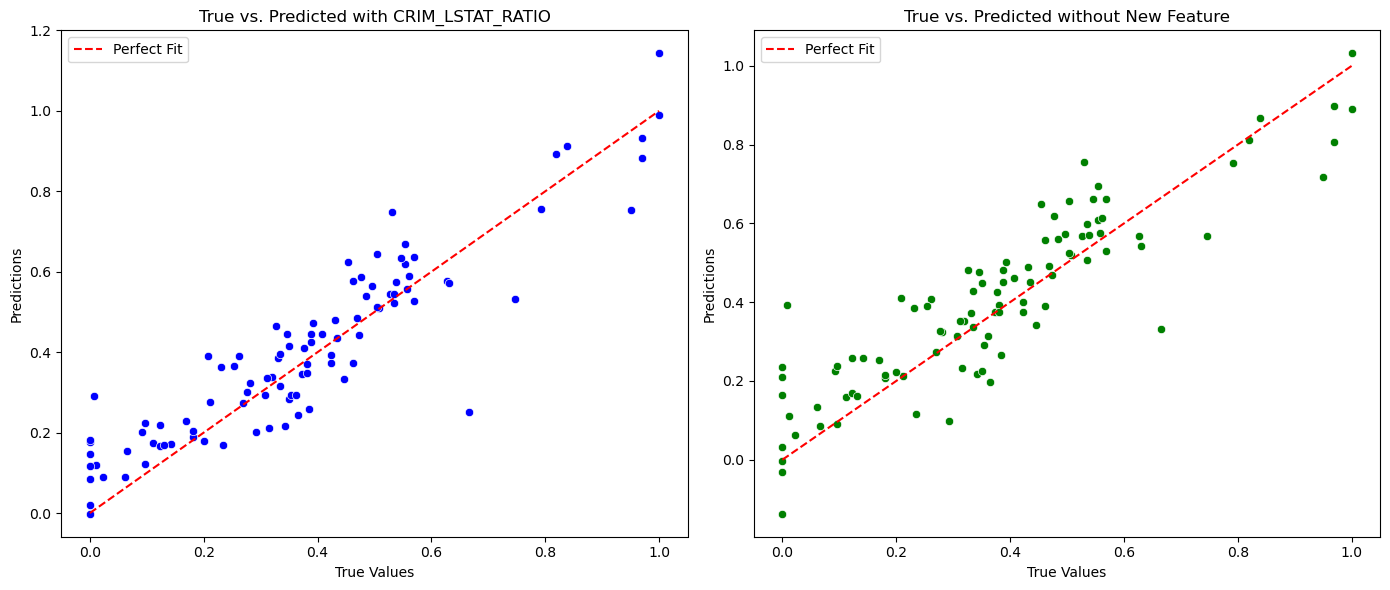

In [148]:
# For plotting
plot_df_with_feature = pd.DataFrame({
    'True Values': y_test,
    'Predictions': y_pred_with_feature
})

plot_df_baseline = pd.DataFrame({
    'True Values': y_test_baseline,
    'Predictions': y_pred_baseline
})

# Plot True vs. Predicted values with the new feature
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='True Values', y='Predictions', data=plot_df_with_feature, color='blue')
plt.plot([plot_df_with_feature['True Values'].min(), plot_df_with_feature['True Values'].max()], 
         [plot_df_with_feature['True Values'].min(), plot_df_with_feature['True Values'].max()], 
         color='red', linestyle='--', label='Perfect Fit')
plt.title('True vs. Predicted with CRIM_LSTAT_RATIO')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

# Plot True vs. Predicted values without the new feature
plt.subplot(1, 2, 2)
sns.scatterplot(x='True Values', y='Predictions', data=plot_df_baseline, color='green')
plt.plot([plot_df_baseline['True Values'].min(), plot_df_baseline['True Values'].max()], 
         [plot_df_baseline['True Values'].min(), plot_df_baseline['True Values'].max()], 
         color='red', linestyle='--', label='Perfect Fit')
plt.title('True vs. Predicted without New Feature')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()

plt.tight_layout()
plt.show()

The MSE and R^2 score are satisfyingly closer to the perfect model metric. The scatter plot also displays that the plots have come significantly closer to the perfect fit line. Thus, it can be said that the model has improved with the addition of features in combination